# Simple Linear Regression

## Importing the libraries

In [6]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

ModuleNotFoundError: No module named 'numpy'

## Importing the dataset

In [89]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Checking for missing values

In [90]:
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## Checking distribution

(array([1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 2., 0., 1., 1., 3., 0.,
        0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.]),
 array([ 1.1  ,  1.288,  1.476,  1.664,  1.852,  2.04 ,  2.228,  2.416,
         2.604,  2.792,  2.98 ,  3.168,  3.356,  3.544,  3.732,  3.92 ,
         4.108,  4.296,  4.484,  4.672,  4.86 ,  5.048,  5.236,  5.424,
         5.612,  5.8  ,  5.988,  6.176,  6.364,  6.552,  6.74 ,  6.928,
         7.116,  7.304,  7.492,  7.68 ,  7.868,  8.056,  8.244,  8.432,
         8.62 ,  8.808,  8.996,  9.184,  9.372,  9.56 ,  9.748,  9.936,
        10.124, 10.312, 10.5  ]),
 <BarContainer object of 50 artists>)

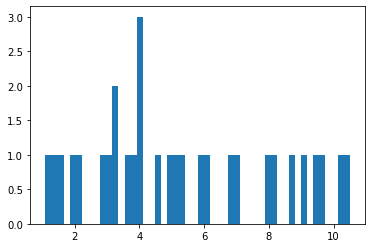

In [134]:
plt.hist(dataset.iloc[:, :-1].values, bins=50)

(array([2., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 4., 0., 2., 0., 2., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 2., 0., 1., 0., 0., 2.]),
 array([ 37731. ,  39424.2,  41117.4,  42810.6,  44503.8,  46197. ,
         47890.2,  49583.4,  51276.6,  52969.8,  54663. ,  56356.2,
         58049.4,  59742.6,  61435.8,  63129. ,  64822.2,  66515.4,
         68208.6,  69901.8,  71595. ,  73288.2,  74981.4,  76674.6,
         78367.8,  80061. ,  81754.2,  83447.4,  85140.6,  86833.8,
         88527. ,  90220.2,  91913.4,  93606.6,  95299.8,  96993. ,
         98686.2, 100379.4, 102072.6, 103765.8, 105459. , 107152.2,
        108845.4, 110538.6, 112231.8, 113925. , 115618.2, 117311.4,
        119004.6, 120697.8, 122391. ]),
 <BarContainer object of 50 artists>)

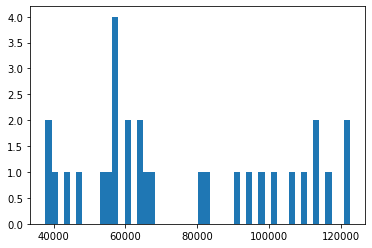

In [132]:
plt.hist(dataset.iloc[:, -1].values, bins=50)

## Spliting dependent and independent variables

In [91]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [110]:
print(y_train)

[ 66029. 116969.  55794. 105582.  60150.  37731.  98273.  63218.  57189.
  56957. 101302.  64445. 122391. 112635.  43525.  91738.  81363.  46205.
  56642.  93940.]


## Training the Simple Linear Regression model on the Training set

In [129]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [112]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 47933.40329761  76283.81470986  72625.69710828  57078.69730156
  37873.57989327 102805.16732132 123839.34353041  68967.5795067
  65309.46190512 107377.81432329]


## Visualising the relationship in the Training set

In [113]:
df_train = pd.DataFrame({"Years of Experience" : X_train.flatten(),
                         "Salary" : y_train})
fig = px.scatter(df_train, x = "Years of Experience",
                 y = "Salary", 
                 #marginal_x="histogram",
                 #marginal_y="histogram",
                 trendline="ols",
                 trendline_color_override="#BC5E21",
                 color_discrete_sequence=["#749CA8"],
                 template = "simple_white")


fig.update_layout(
    legend=dict(
        x=.01,
        y=.98,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="Black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="dimgray",
        borderwidth=2
    ))

# retrieve model estimates
model = px.get_trendline_results(fig)
alpha = model.iloc[0]["px_fit_results"].params[0]
beta = model.iloc[0]["px_fit_results"].params[1]

# restyle figure
fig.data[0].name = 'observations'
fig.data[0].showlegend = True
fig.data[1].name = fig.data[1].name  + ' y = ' + str(round(alpha, 2)) + ' + ' + str(round(beta, 2)) + 'x'
fig.data[1].showlegend = True

# addition for r-squared
rsq = model.iloc[0]["px_fit_results"].rsquared
fig.add_trace(go.Scatter(x=[0], y=[0],
                         name = "R-squared" + ' = ' + str(round(rsq, 2)),
                         showlegend=True,
                         mode='markers',
                         marker=dict(color='rgba(0,0,0,0)')
                         ))

fig.show()

results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     407.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           8.22e-14
Time:                        16:56:49   Log-Likelihood:                -199.93
No. Observations:                  20   AIC:                             403.9
Df Residuals:                      18   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.781e+04   2721.997     10.218      0.000    2.21e+04    3.35e+04
x1          9145.2940    453.078     20.185      0.000    8193.412    1.01e+04
==============================================================================
Omnibus:                        0.291   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.462
Skew:                           0.164   Prob(JB):                        0.794
Kurtosis:                       2.332   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see a very close relationship between years of experience and salary. Our model/predictions (the line) are very close from the training data. The linear model we build is very likely to predict salary from years of experience very well using new data that wasn't used to build the model. We will investigate how well our model does this by looking at the test data. 

## For simpler plot 

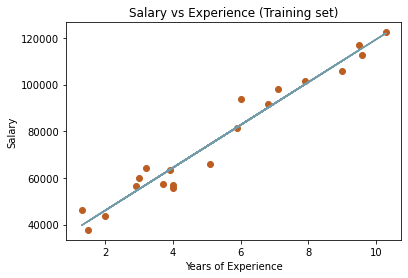

In [117]:
plt.scatter(X_train, y_train, color = '#BC5E21')
plt.plot(X_train, regressor.predict(X_train), color = '#749CA8')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualizing the relationship in the test set 

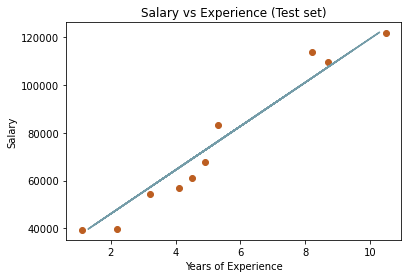

In [130]:
plt.scatter(X_test, y_test, color = '#BC5E21')
plt.plot(X_train, regressor.predict(X_train), color = '#749CA8')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

We see that our model/predictions (the blue line) is very close from the test data which is a good indication that the model performs well at predicting salary from years of experience. We can test this more formally.

## Diadnostic of predictions compared to actual data

In [115]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 40071705.38


In [116]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.95


In [122]:
df_diag = pd.DataFrame({"Predicted Salary" : y_pred,
                         "Actual Salary" : y_test})
fig = px.scatter(df_diag, x = "Predicted Salary",
                 y = "Actual Salary", 
                 #marginal_x="histogram",
                 #marginal_y="histogram",
                 trendline="ols",
                 trendline_color_override="#BC5E21",
                 color_discrete_sequence=["#749CA8"],
                 template = "simple_white")


fig.update_layout(
    legend=dict(
        x=.01,
        y=.98,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="Black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="dimgray",
        borderwidth=2
    ))

# retrieve model estimates
model = px.get_trendline_results(fig)
alpha = model.iloc[0]["px_fit_results"].params[0]
beta = model.iloc[0]["px_fit_results"].params[1]

# restyle figure
fig.data[0].name = 'observations'
fig.data[0].showlegend = True
fig.data[1].name = fig.data[1].name  + ' y = ' + str(round(alpha, 2)) + ' + ' + str(round(beta, 2)) + 'x'
fig.data[1].showlegend = True

# addition for r-squared
rsq = model.iloc[0]["px_fit_results"].rsquared
fig.add_trace(go.Scatter(x=[0], y=[0],
                         name = "R-squared" + ' = ' + str(round(rsq, 2)),
                         showlegend=True,
                         mode='markers',
                         marker=dict(color='rgba(0,0,0,0)')
                         ))

fig.show()

results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


/home/louis/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           6.05e-07
Time:                        17:14:25   Log-Likelihood:                -100.66
No. Observations:                  10   AIC:                             205.3
Df Residuals:                       8   BIC:                             205.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8464.7110   6219.719     -1.361      0.211   -2.28e+04    5877.987
x1             1.0955      0.077     14.150      0.000       0.917       1.274
==============================================================================
Omnibus:                        2.110   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.148
Skew:                           0.530   Prob(JB):                        0.563
Kurtosis:                       1.722   Cond. No.                     2.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we see that the salary prediction for the test set are very close from the actual data and from the perfect prediction which would be the blue line. Our model is perfoming very well ! 

## For a simpler plot

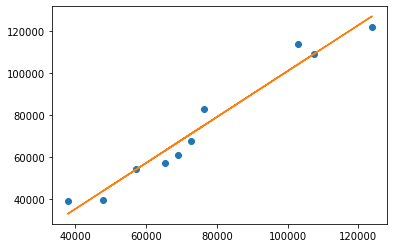

In [127]:
plt.plot(y_pred, y_test, "o")
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, m*y_pred + b)